# Implementation of Logistic Regression on 'Titanic Dataset' from kaggle

We all are aware about the history of Titanic being sinked and making it one of the tragic incidence in the past.

Here, with the help of the given dataset we would try to find the prediction wheather a person onboard Titanic had survived or not.

This dataset have many factors like age, Passenger class, gender to check for the survival.

Here in this dataset, we are having semicleaned data which is fetched through kaggle.

The survival prediction here would be performed with the implementation of Logical Regression which is a robust method to give prediction for binary input.

Here the logical regression isused as it is one of the best and reliable model for predicting the outcome out of two choices.

Here we need to predict whether a passenger survived or not thus Logical regression is a basic choice for this prediction.

# Import Libraries and fetching Data 

###### To get started with the predicting model we will import some libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Fetching data from the csv sheet

The csv sheet for dataset used here is fetched from global community 'kaggle'

In [2]:
titanic= pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring and Analysing given titanic data 

In [3]:
titanic.shape

(891, 12)

here we used .shape to get information about the size of rows and column which depict for how many people we are having the dataset and how many factors we got to predict the survival.

We get to know that the information is given for 891 people and there are 12 distinguishing factors present.

## Visualising the dataset 

Here we are using seaborn plots for visualising the survival over different aspects.

Also we are visualising the survived and deseased people 

<Axes: xlabel='Survived', ylabel='count'>

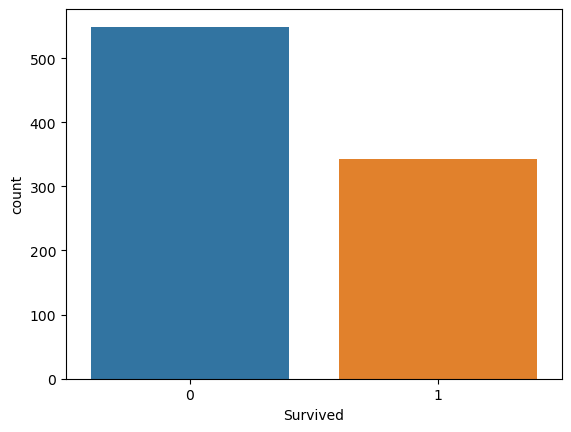

In [4]:
sns.countplot(x='Survived',data=titanic)

This is graphical representation of people who survived (represented by 1) and not able to survived ( represented by 0)

Here we can see that 61% people were not able to survived and lost thier life.

In [5]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

The total number of passengers are 891 out of which number of survivals are 342 and 549 casualitites.

This depicts that there were not even 50 percent of people who survived the incidence.

<Axes: xlabel='Survived', ylabel='count'>

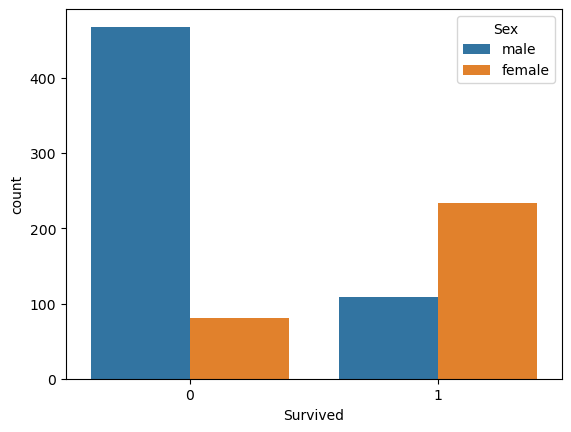

In [6]:
sns.countplot(x='Survived', hue='Sex', data=titanic)

This graph is a visual representation which indicates the number of male and female who got survived and was not able to survive in the whole incoidence 

We can see that the most casualities are from male section and this turns out to a conclusion that most female onboard were saved in the incidence

This incidence tells that the difference of female survivors are more as during the evacuation process females and minors are evacuated first.

Moreover, less than 100 female casualitites were there making male casualities to ne more than 450

# Graphical representation of distinguishing people on the basics of their class and Age 

<Axes: xlabel='Survived', ylabel='count'>

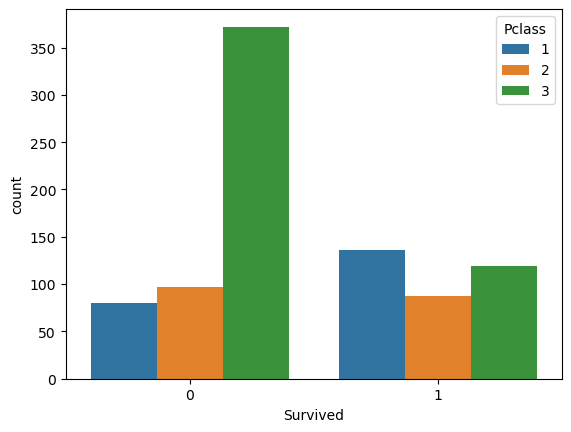

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

####   Here with the data we can see that there were three classes in which passengers were divided .
#### These 3 classes are divided in accordance to the fair they paid for the cruise

There are three class in which people were able to choose their stays in titanic 
This graph gives a visualisation of people from each classes who survived and were not able to survive.

From this visualisation we can see that the most survived passengers were from Class 1 which is obvious as they paid more and were more important  

Also this depicts that most of the died passengers belonged from the class 3.

###  analysing the age group 

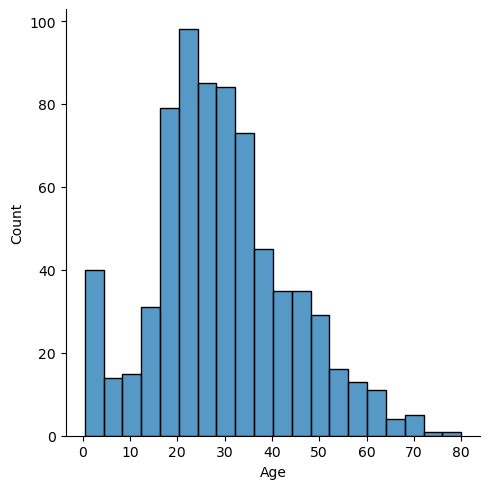

In [8]:
sns.displot(titanic['Age'].dropna())

Here we can see that the major people onboard belonged to the age group of 20 to 30 years.

This is kind of obvious as this titanic cruise was supposed to one of the first adventurous voyage attracting a huge number of young people looking for exciting journey. 

<Axes: xlabel='SibSp', ylabel='count'>

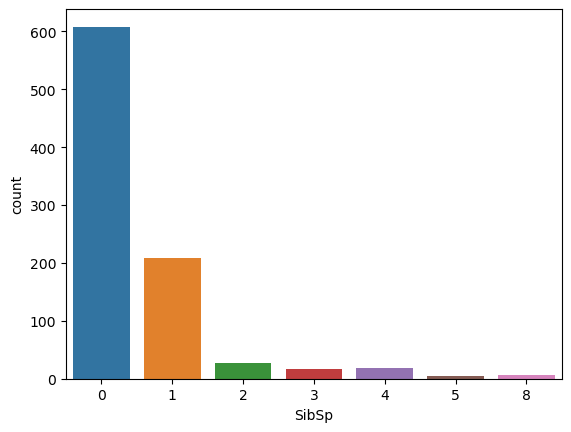

In [9]:
sns.countplot(x='SibSp',data=titanic)

The visualisation of 'SibSp' column depits the people who were on the titanic with their sibling or with their spouse

This directly depicts the people who are on the family trip or for a adventurous tour with their partner or were on the titanic for some adventure on their own.

This indicated that the major number of people around 600 were not having any sibling or with spouse on the trip.

###  Fare distribution analysis

<Axes: ylabel='Frequency'>

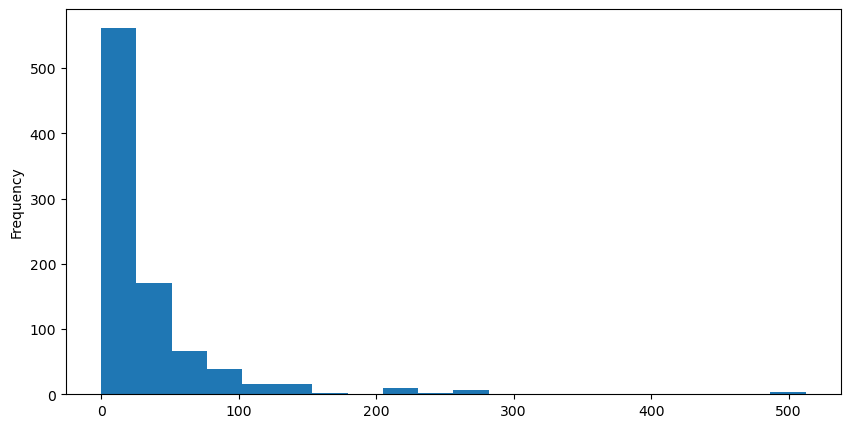

In [10]:
titanic['Fare'].plot.hist(bins=20, figsize=(10,5))


Here, with this plot we can conclude that most number of passengers were travelling with the minimum fare range which was less than $100. 

Also there were passengers who had spent a lot to be on that trip.

This shows that there were very less people belonging to Class 1.

# Analysing and modifying data for prediction

In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here by the information we can see that 'age' and 'cabin' have the most null values so we will try to average out the age remove the cabin as that holds no importance for the training and testing of model. 

You might think that why only cabin needs to be removed but not age, so that is because age is an important factor here which can be useful to get the more accurate prediction.

There are some cells of age which are null but we can fill that with the average ages.

<Axes: >

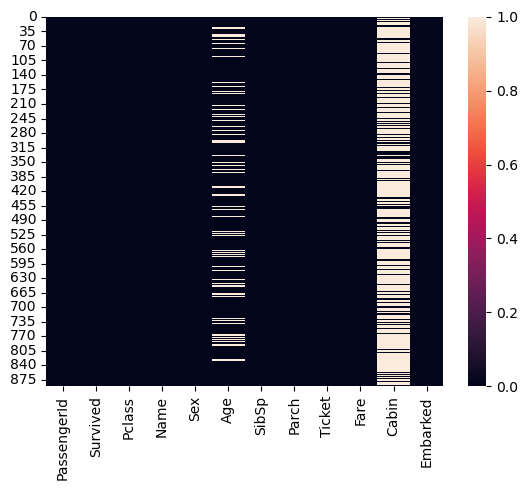

In [12]:
sns.heatmap(titanic.isnull())

Representing null spaces for clear visualization and understanding

We can see that more than 20 percent of age data is missing and roughly 77 percent is missing in cabin rows.

The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation which can be averaging the ages according to the passenger class.

##  Data cleaning and dropping

Here we will try to fill the missing data in age rows instead of dropping it out. Here we are having many option to fill in the missing space but by opting for a smarter and efficient approach we will check for the average age of each passenger class

<Axes: xlabel='Pclass', ylabel='Age'>

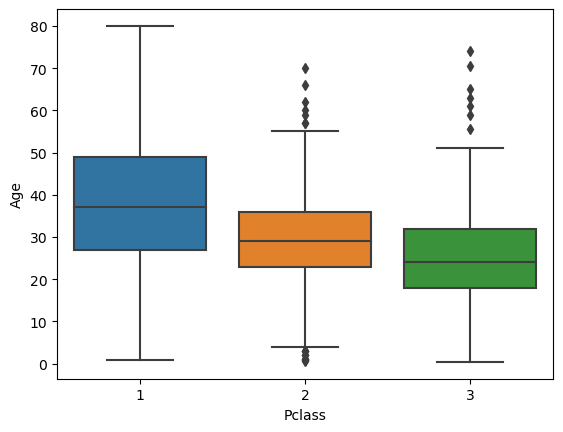

In [13]:
plt.figure()
sns.boxplot(x='Pclass',y='Age',data=titanic)

Hereby this boxplot, we can see the higher classes tend to consists of older people which tends to be wealthier, which makes sense. We'll use these average age values to impute based on Pclass for Age.

Here, the lower line of the box depicts the 25percentile while the upper ones depicts the 100 percentile and the mid one is for depicting the 50 percentile also the outliners are fixed at near 0 and near 80 for Class 1 and also same for other classes.

The outliners are responsible for significantly affecting the average ages for each of the 3 classes.

By the observation we found that the average ages for the defined 3 classes are 37, 29 and 24 respectively.

####  Entering Average ages 

There is a need to enter average age according to the Passenger class in the age row.

For that we are implementing a function using if else condition.

We also intend to apply this function by using '.apply()' method 

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [15]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

#####  We intend to check the heat map again to make sure that our function worked successfully 

This heat map shows the null values for each specific column

<Axes: >

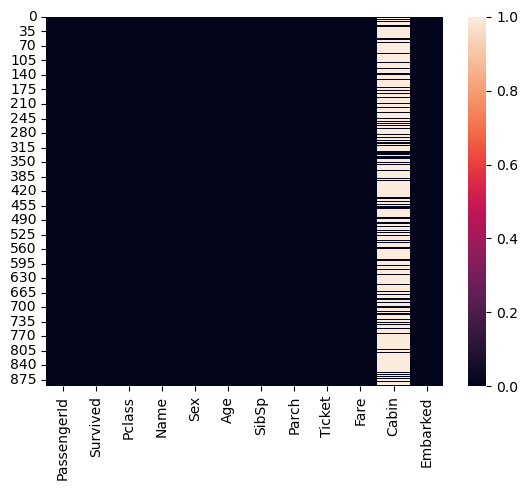

In [16]:
sns.heatmap(titanic.isnull())

#####  We can see that our function is working properly and all the null space in age row is now filled with the average ages.

Also we can see that only null values which are present in the heat map is from the Cabin row.

We can not average out cabin values burt we csn try other methods like 0,1 representation for having a cabin description or not.

Here cabin does not hold any such importance in regards of predicting the survival so we can simply drop the row to make the data more redable and reliable to understand.

This would bring simplicity to the data as no null values would be there.

##### We can simply drop the row by using '.drop()' method

In [17]:
titanic.drop('Cabin', axis=1, inplace=True)

In [18]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


###  Converting and Clarifyig the factors in terms of (1,0)

This conversion of factors like sex and embarked into more readable form of (0,1) would make the data more easily readable and can be distinguised easily 

It would help to make the prediction easy and this be possible by converting the types of factors into binary forms.

The 'Sex' and 'Embarked' are categorised as 'male, female' and 'Q, S, C' which is very difficult to read and interpret in short period of time.

So to overcome this lag we can use libraries like pandas to convert the data into dummy variables or by using labelencoder by sklearn.

For 'Sex" row we use Labelencoder. In labelencoder we just label the sex being male as 1 and for female it would be 0'.

While in 'Embarked' we can convert the sub categories into dummy variables.

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
titanic['Sex']= labelencoder.fit_transform(titanic['Sex'])

 importing labelencounter for tranforming sex (male and female) into (1,0) which would be implemented in the data.

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


Here the dummy variable work by dropping off the first row as for example for embarked to be categoriezed as Q it would be (1,0) and for S, it would be (0,1) but for C, it would be (0,0) i.e, not Q not S, letting C be the only possible option for it.

In [21]:
pd.get_dummies(titanic['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
Embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

#### Dropping unnecessary rows and concatinating new ones

Here we would like to drop off the unnecessary rows which are not of much importance and not affect the survival prediction.

Also we would like to add the new rows which are conventionally converted according to the categorising features.

Above we use 'embark' as the new updated row which cann be used for concatination.

We need not to drop the unnecessary rows which are listed as Embarked, Name and Ticket. 

These rows holds no value in terms of predicting the survial of the passengers and thus can be ommited through the data.


In [23]:
titanic.drop(['Embarked','Name','Ticket'],axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [24]:
titanic= pd.concat([titanic,Embark],axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1


The concatination gives the data a new look.

Here we can see that the sex is now representedf in terms of 1,0 and also the Q and S are represented in 1,0 which can be used for finding the embarkment .

This data is now ready for training and testing purpose which is the sole aim for predicting the survival.


# Building and training a Logistic Regressing Model

As for regression we need to first train and test the data which makes it necessary to divide the data for training and testing purpose.

the procedure further goes to train for getting the accuracy which is acceptable.

##  Training the model 

Training is done by working out the model on the given data set for a specific proportion of data and then testing the model for accurate outcomes on the remainning data.

We can train model on any amount of data but for general and reliable models we tend to maximise tge training data

####  Slpiting the data for training and testing 

The spliting of data is done by passing through one more step where we drop the 'Survived' row as we need to find it as a prediction.

Also the drop is done for X-axis and Y-axis is used for showcasing the data output as a prediction.

So we tend to use ".drop()" to remove survive row from the dataset and then storing it in Y-axis.


In [25]:
titanic.drop('Survived',axis=1).head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,3,1,22.0,1,0,7.2500,0,1
1,2,1,0,38.0,1,0,71.2833,0,0
2,3,3,0,26.0,0,0,7.9250,0,1
3,4,1,0,35.0,1,0,53.1000,0,1
4,5,3,1,35.0,0,0,8.0500,0,1


In [26]:
titanic['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

We can split the data in any ratio for testing and training.

Here are used 30 percent of the data for testing and the remaining for training purpose i.e. 70 percent data is used as training data.

This means the data would be trained by this 70%  and would be tested on the remaining 30% dataset.


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(titanic.drop('Survived',axis=1),
                                                   titanic['Survived'], test_size= 0.3, random_state= 0)

## Logistic Regression for training the model


###### Here we used logistic regression to train the model as it is robust with (0,1)(binary response).


Here we used the spliited set of test and training for training the model.

Here we had maximum iteration to be 1000 so to prevent the lbfgs algorithm from failing the convergence.

Before moving further, the concept of repeated execution of a set of statements is called iteration.

Limited-memory BFGS (L-BFGS or LM-BFGS) is an optimization algorithm and is one of the popular algorithm for parameter estimation in machine learning.

So to prevent that, we maximise the iteration which is by default fixwed to 100.

 

In [28]:
from sklearn.linear_model import LogisticRegression
Mod= LogisticRegression(random_state=0, max_iter=1000)
Mod.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

Also, the  Mod is the object we used for storing the logical regression model.

Here we will now be able to predict the survival by using the regression.

For that we used ".predict()" to do the prediction of X axis test and also to cross verify we did Y test as well.

In [29]:
prediction= Mod.predict(X_test)

In [30]:
print(Mod.predict(X_test))

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1]


Here we used ".predict()" method to get the prediction and passed the X test array.

Which gives us the survival of all onboard passengers in terms of 0 and 1 where 1 means that the passenger survived.

In [31]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
263    0
718    0
620    0
786    1
64     0
Name: Survived, Length: 268, dtype: int64


For checking the prediction being true, we check for y test 

This ensures thatb we had the same result in x test as in y test.

Altough these test caan be checked for accuracy and the predictions can be generated by confusion matrix which is byfar imported from sklearn for specifically predicting out the arrays

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(Y_test, prediction)

array([[144,  24],
       [ 28,  72]], dtype=int64)

This depicts that the difference of x and y test are in the following points.

for example through the array obtained from confusion matrix we get to know that survival of passenger listed at 24 , 28 and so on are not currectly predicted.

###  Accuracy check

This Block is used for checking the accuracy of Y test which gives the accuracy of model in predicting the survival.

Above we even had the list of whole survived passengers in (0,1) format but that can not be used for predicting each as a whole.

So as to find the Model relevance we had the accuracy score which can be easily imported from sklearn and can be used for the same.


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(Y_test, prediction)

0.8059701492537313

This model is acurate by 0.80 this means for a data set it would give correct prediction for 80 out of 100 times for sure.

This means the accuracy is more than 80% for this model.

This is a pretty good model and the accuracy can be improved further more by using other advanced algorithms like Advanced Boosting algorithm or Gradient Boosting algorithm.



##  Evalution 

We can check precision by using classification report.

It is a visualiser which displays the scores of different criteria to check the prediction accuracy of the model and works as a performance evaluation metric.

It is used to measure the quality of predictions from a classification algorithm.

Here we can use the prediction of Y test to get a detailed report consisting of recall rate, precision and f1- score.



In [36]:
from sklearn.metrics import classification_report

In [37]:

print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.75      0.72      0.73       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.81      0.81       268



##### Classification report

This summarizes the quality of classification and accuracy of the model being constructed.
The listed classification holds the value on the below defined defination.

1) Precision: It is calculated with respect to the predicted values. 

2) Recall: It is calculated with respect to the actual values in dataset.

3) F1-score: It is the harmonic mean of precision and recall.

4) Support: It is the total entries of each class in the actual dataset.

##  Conclusion and Understandings

The above model made us understand that we can be reliable on this model for predicting the survival but only 80% of the times it would be correct i.e 4 out of 5 times it would give correct prediction and there still can be error for 1 out of 5 times.

While making this model, we get to know and understand about the dataset on which we were working and found some interesting insights and observations. 

###### The observations are as follows:

1) The surviving passengers were overall consist of mosst of the women which were about 250.

2) The surving passengers mostly belonged to the class 1 that means the wealthier passengers were tend to be more important while evacuating.

3) The evacuation process focussed more on the women and children as most of the casualties are from men side which is roughly 450.

4) The most passengers lost their lives belongs to class 3 that means the people tends to belonging to economical class were ignored in comparison to other upper class.

5) The next observation is that most people present on that incidence were belonging from the age group of 20 to 30 years.

